<a href="https://colab.research.google.com/github/rapster1/Week1_Public/blob/master/%5CChallengeProject%5CTSH_FTW_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd

url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/ChallengeProjects/Week1/allhypo.train.data.csv"
dataset=pd.read_csv(url) 
dataset.head(10)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


In [169]:
dataset.describe()

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,264,2,65,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative.|1710
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2665,2516,284,2215,585,2616,184,2503,297,2505,295,2800,2800,1632,1


In [170]:
import numpy as np

dataset = dataset.replace(to_replace='?', value=float("NaN"))
numeric_columns = ['Age', 'TSH', 'T3', 'TT4', 'T4u', 'FTI']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)

dataset.head(10)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807
5,18.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,NaN,t,183.0,t,1.30,t,141.0,f,NaN,other,negative.|3434
6,59.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,72.0,t,0.92,t,78.0,f,NaN,other,negative.|1595
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.20,t,0.6,t,80.0,t,0.70,t,115.0,f,NaN,SVI,negative.|1367
8,66.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,t,0.60,t,2.2,t,123.0,t,0.93,t,132.0,f,NaN,SVI,negative.|1787
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.40,t,1.6,t,83.0,t,0.89,t,93.0,f,NaN,SVI,negative.|2534


In [171]:
dataset=dataset.drop('TBG', axis=1)

In [172]:
for i, diagnosis in enumerate(dataset['class']):
  ndiagnosis = diagnosis.split('.')[0]
  dataset.at[i,'class'] = ndiagnosis

In [173]:
dataset['class'] = dataset['class'].replace({'compensated hypothyroid': 1, 'primary hypothyroid': 2, 'secondary hypothyroid': 3, 'negative': 0})
dataset['class'] = dataset['class'].apply(pd.to_numeric)

In [174]:
dataset['class'].unique()

array([0, 1, 2, 3])

In [175]:
dataset.count()

Age                          2799
Sex                          2690
On thyroxine                 2800
query on thyroxine           2800
on antithyroid medication    2800
sick                         2800
pregnant                     2800
thyroid surgery              2800
I131 treatment               2800
query hypothyroid            2800
query hyperthyroid           2800
lithium                      2800
goitre                       2800
tumor                        2800
psych                        2800
TSH measured                 2800
TSH                          2516
T3 measured                  2800
T3                           2215
TT4 measured                 2800
TT4                          2616
T4U measured                 2800
T4u                          2503
FTI measured                 2800
FTI                          2505
TBG measured                 2800
referral source              2800
class                        2800
dtype: int64

In [176]:
# dataset=dataset[(dataset['TSH'].notnull())]

In [177]:
dataset.count()

Age                          2799
Sex                          2690
On thyroxine                 2800
query on thyroxine           2800
on antithyroid medication    2800
sick                         2800
pregnant                     2800
thyroid surgery              2800
I131 treatment               2800
query hypothyroid            2800
query hyperthyroid           2800
lithium                      2800
goitre                       2800
tumor                        2800
psych                        2800
TSH measured                 2800
TSH                          2516
T3 measured                  2800
T3                           2215
TT4 measured                 2800
TT4                          2616
T4U measured                 2800
T4u                          2503
FTI measured                 2800
FTI                          2505
TBG measured                 2800
referral source              2800
class                        2800
dtype: int64

In [178]:
dataset.corr()

,Age,TSH,T3,TT4,T4u,FTI,class
Age,1.000000,-0.059776,-0.244702,-0.052111,-0.163357,0.037623,-0.014912
TSH,-0.059776,1.000000,-0.160890,-0.254791,0.067705,-0.291188,0.537133
T3,-0.244702,-0.160890,1.000000,0.563901,0.463434,0.351013,-0.210552
TT4,-0.052111,-0.254791,0.563901,1.000000,0.434248,0.795206,-0.329668
T4u,-0.163357,0.067705,0.463434,0.434248,1.000000,-0.173056,0.040790
FTI,0.037623,-0.291188,0.351013,0.795206,-0.173056,1.000000,-0.364434
class,-0.014912,0.537133,-0.210552,-0.329668,0.040790,-0.364434,1.000000


In [179]:
categorical_columns=[]
def generate_categorical_columns():
    categorical_columns = []
    for i in dataset.columns:
        if i not in numeric_columns:
            categorical_columns.append(i)
    print(numeric_columns)
    print(categorical_columns)

generate_categorical_columns()

# dataset[categorical_columns].describe()
medians = dataset[numeric_columns].median()
print(medians)
dataset = dataset.replace(to_replace=np.nan, value=medians)

dataset=dataset.drop('TBG measured', axis=1)
dataset

['Age', 'TSH', 'T3', 'TT4', 'T4u', 'FTI']
['Sex', 'On thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source', 'class']
Age     54.00
TSH      1.40
T3       2.00
TT4    104.00
T4u      0.98
FTI    107.00
dtype: float64


,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,referral source,class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,0
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,0.98,f,107.0,other,0
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2.0,t,109.0,t,0.91,t,120.0,other,0
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,0.98,f,107.0,other,0
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.70,f,2.0,t,155.0,t,1.05,t,148.0,SVI,0
2796,73.0,M,f,t,f,f,f,f,f,f,f,f,f,f,f,f,1.40,t,0.7,t,63.0,t,0.88,t,72.0,other,0
2797,75.0,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,1.40,f,2.0,t,147.0,t,0.80,t,183.0,other,0
2798,60.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.40,f,2.0,t,100.0,t,0.83,t,121.0,other,0


In [180]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.columns

Index(['Age', 'TSH', 'T3', 'TT4', 'T4u', 'FTI', 'class', 'Sex_M',
       'On thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t',
       'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t',
       'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'psych_t', 'TSH measured_t', 'T3 measured_t',
       'TT4 measured_t', 'T4U measured_t', 'FTI measured_t',
       'referral source_SVHC', 'referral source_SVHD', 'referral source_SVI',
       'referral source_other'],
      dtype='object')

In [181]:
from sklearn.model_selection import train_test_split

## Your code here

feature_names=['TSH', 'FTI']

X_train, X_val, y_train, y_val = train_test_split(dataset[feature_names], dataset['class'], test_size=0.2, random_state=8675309)

Training Accuracy is  97.99107142857143
Validation Accuracy is  97.67857142857143
Confusion Matrix:
[[508   8   3   0]
 [  0  25   1   0]
 [  0   0  14   0]
 [  1   0   0   0]]

Normalized Confusion Matrix:
[[0.97880539 0.01541426 0.00578035 0.        ]
 [0.         0.96153846 0.03846154 0.        ]
 [0.         0.         1.         0.        ]
 [1.         0.         0.         0.        ]]


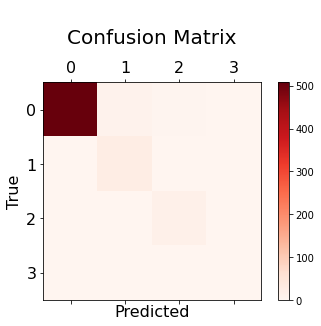

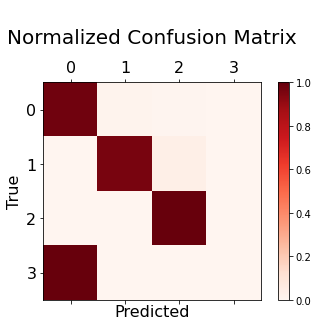

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=4, min_samples_leaf=5)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# training/fitting the model with training data
decision_tree.fit(X_train, y_train)

#printing accuracy of testing & training data
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)


# Use sklearn to make the confusion matrix
print('Confusion Matrix:')
labels = [0,1,2,3]
cm = metrics.confusion_matrix(y_val, y_val_pred, labels)
print(cm)

# Normalized confusion matrix
print('\nNormalized Confusion Matrix:')
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm,labels)
plot_cmatrix(cm_norm,labels,title='Normalized Confusion Matrix')

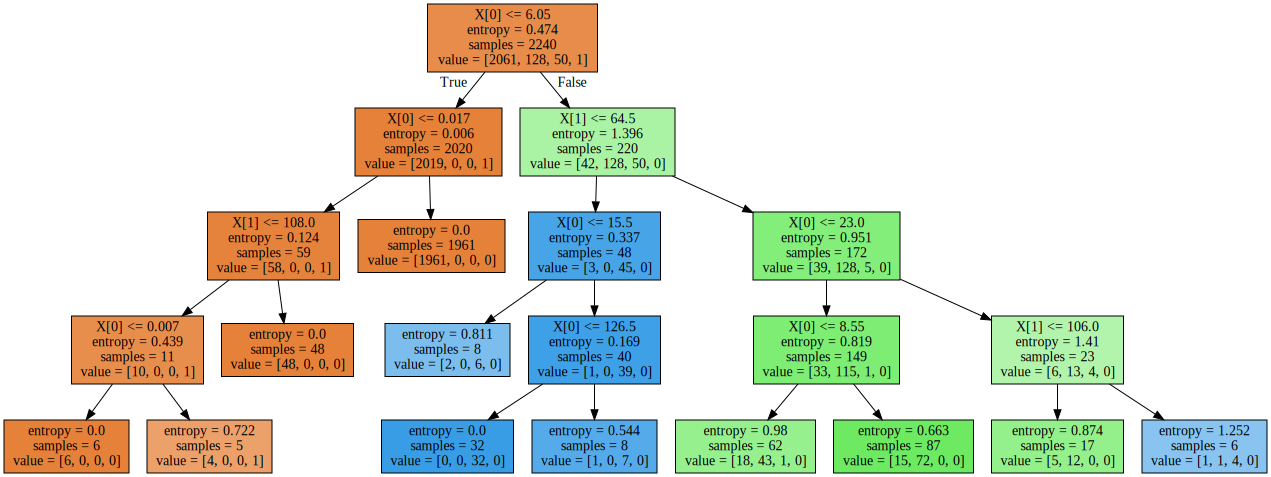

In [186]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

Training Accuracy is  98.54910714285714
Accuracy: 0.9854910714285714
True Positive: 150
True Negative: 1616
False Positive: 23
False Negative: 3


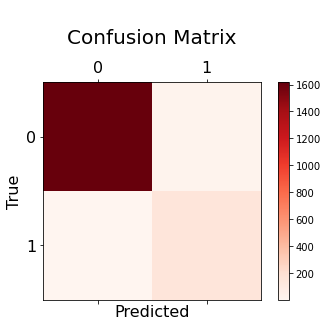

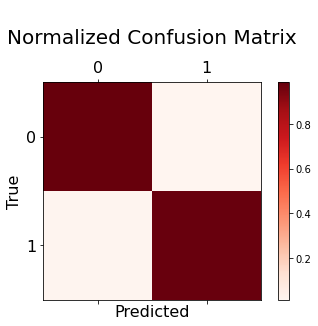

Validation Accuracy is  96.875
Accuracy: 0.96875
True Positive: 22
True Negative: 412
False Positive: 10
False Negative: 4


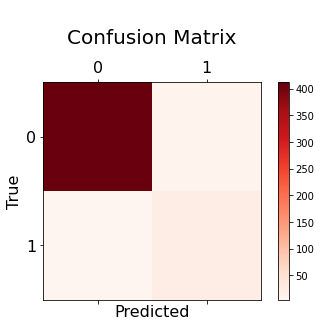

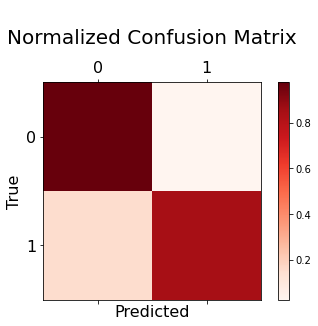

In [106]:
def plot_cmatrix(cm,labels=[0,1],title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()

def solve_Metrics(model, X, y, scaled=False):
    y_pred = model.predict(X)
    
    TP = ((y == 1) & (y_pred == 1)).sum()
    TN = ((y == 0) & (y_pred == 0)).sum()
    FP = ((y == 0) & (y_pred == 1)).sum()
    FN = ((y == 1) & (y_pred == 0)).sum()
    
    print("Accuracy:", accuracy_score(y, y_pred))
    print("True Positive:", TP)
    print("True Negative:", TN)
    print("False Positive:", FP)
    print("False Negative:", FN)
    
    plot_cmatrix([[TN, FP],[FN, TP]])
    plot_cmatrix([[TN/(TN+FP), FP/(TN+FP)],[FN/(FN+TP), TP/(FN+TP)]], title="Normalized Confusion Matrix")

def solve_Metrics_2(y, y_pred):
    TP = ((y == 1) & (y_pred == 1)).sum()
    TN = ((y == 0) & (y_pred == 0)).sum()
    FP = ((y == 0) & (y_pred == 1)).sum()
    FN = ((y == 1) & (y_pred == 0)).sum()
    
    print("Accuracy:", accuracy_score(y, y_pred))
    print("True Positive:", TP)
    print("True Negative:", TN)
    print("False Positive:", FP)
    print("False Negative:", FN)
    
    # plot_cmatrix([[TN, FP],[FN, TP]])
    plot_cmatrix([[TN, FP],[FN, TP]])
    plot_cmatrix([[TN/(TN+FP), FP/(TN+FP)],[FN/(FN+TP), TP/(FN+TP)]], title="Normalized Confusion Matrix")
    
    
# FinalModel=0
def perform_decision_tree():
    decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                                  max_depth=5)  # minimum sample leafs is the minimum sample 
                                                                    # amount the leaf can have

    # print(X_train.columns)
    aspect = ['TSH', 'FTI']
    # training/fitting the model with training data
    decision_tree.fit(X_train[aspect], y_train)

    #printing accuracy of testing & training data
    y_train_pred=decision_tree.predict(X_train[aspect])
    print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
    solve_Metrics(decision_tree, X_train[aspect], y_train)
    
    y_val_pred=decision_tree.predict(X_val[aspect])
    print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
    solve_Metrics(decision_tree, X_val[aspect], y_val)
    
    dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)
    graph = graphviz.Source(dot_data)
    # graph.view()
    
    # global FinalModel
    # FinalModel = decision_tree

perform_decision_tree()

Training Accuracy is  98.38169642857143
Accuracy: 0.9838169642857143
True Positive: 153
True Negative: 1610
False Positive: 29
False Negative: 0


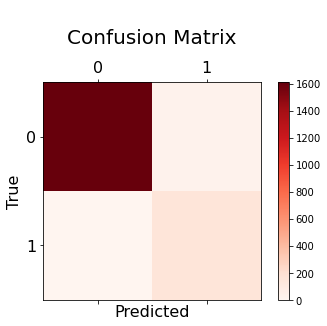

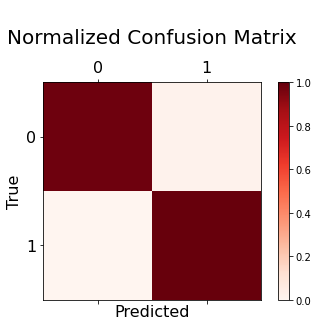

Validation Accuracy is  96.65178571428571
Accuracy: 0.9665178571428571
True Positive: 25
True Negative: 408
False Positive: 14
False Negative: 1


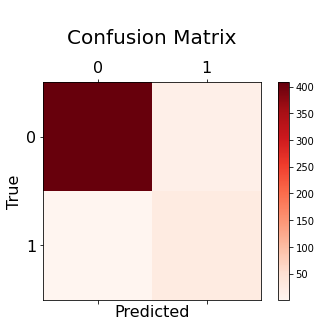

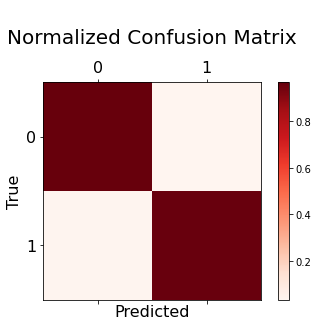

In [107]:
ModelTSH=DecisionTreeClassifier(max_depth=1)
ModelFTI=DecisionTreeClassifier(max_depth=1)
ModelTT4=DecisionTreeClassifier(max_depth=1)

# print(X_train.columns)
ModelTSH.fit(X_train[X_train['TSH measured_t'] == 1][['TSH']], y_train[X_train['TSH measured_t'] == 1])
ModelFTI.fit(X_train[X_train['FTI measured_t'] == 1][['FTI']], y_train[X_train['FTI measured_t'] == 1])
ModelTT4.fit(X_train[X_train['TT4 measured_t'] == 1][['TT4']], y_train[X_train['TT4 measured_t'] == 1])

def our_predict(X):
    cnt,cnt2=0,0
    y=np.ndarray(len(X), dtype=int)
    for i in range(len(X)):
        x = X.iloc[i]
        if(x['TSH measured_t']):
            y[i] = ModelTSH.predict(x['TSH'].reshape(-1, 1))
        elif(x['FTI measured_t']):
            y[i] = ModelFTI.predict(x['FTI'].reshape(-1, 1))
        elif(x['TT4 measured_t']):
            y[i] = ModelTT4.predict(x['TT4'].reshape(-1, 1))
        else:
            y[i] = 0
    return y


def our_predict_2(X):
    cnt,cnt2=0,0
    y=np.ndarray(len(X), dtype=int)
    for i in range(len(X)):
        x = X.iloc[i]
        if(x['TSH measured'] == 't'):
            y[i] = ModelTSH.predict(x['TSH'].reshape(-1, 1))
        elif(x['FTI measured'] == 't'):
            y[i] = ModelFTI.predict(x['FTI'].reshape(-1, 1))
        elif(x['TT4 measured'] == 't'):
            y[i] = ModelTT4.predict(x['TT4'].reshape(-1, 1))
        else:
            y[i] = 0
    return y
            
        
# our_predict(X_train)

def our_predict_results():
    y_train_pred=our_predict(X_train)
    print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
    solve_Metrics_2(y_train, y_train_pred)
    
    y_val_pred=our_predict(X_val)
    print("Validation Accuracy is ", accuracy_score(y_val, y_val_pred)*100)
    solve_Metrics_2(y_val, y_val_pred)

our_predict_results();

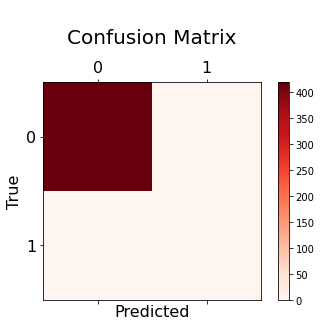

[[ 1.  0.]
 [nan nan]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [108]:
import sklearn

cm = metrics.confusion_matrix(y_val,y_val_pred, [0, 5])
plot_cmatrix(cm,[0, 1, 2, 3])

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

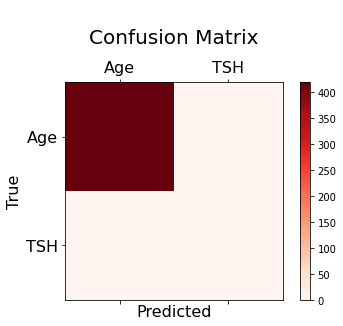

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


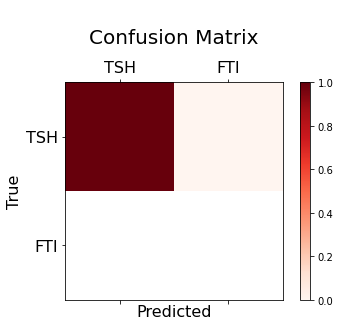

In [109]:
import sklearn

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()

y_val_pred=decision_tree.predict(X_val)
cm = metrics.confusion_matrix(y_val,y_val_pred, [0, 5])
plot_cmatrix(cm,feature_names)

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_cmatrix(cm_norm,['TSH', 'FTI'])

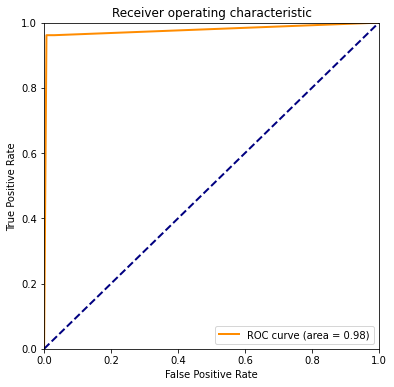

In [110]:
# Predict class label probabilities
labels = [0,1]
y_val_prob = decision_tree.predict_proba(X_val,labels)

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [111]:
# import pickle

# data_test=pd.read_csv("allhypo.test.data.csv") # Downloaded locally

# predictions=pd.DataFrame({"guesses":[0,1,0,1],"prob_neg":[.75,.15,.63,.20],"prob_pos":[.25,.85,.27,.80]})
# prediction_pickle_path = 'prediction_pickle.pkl'

# prediction_pickle = open(prediction_pickle_path, 'wb')
# pickle.dump(predictions, prediction_pickle)
# files.download(prediction_pickle_path)
# prediction_pickle.close()

In [146]:
import pickle
import pandas as pd

url="https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/ChallengeProjects/Week1/allhypo.test.data.csv"
testdata=pd.read_csv(url) 
testdata.head(10)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source
0,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other
1,63,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.5,t,2.5,t,108,t,0.96,t,113,f,?,SVI
2,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.6,t,2.4,t,61,t,0.82,t,75,f,?,SVHD
3,53,F,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.25,t,2.1,t,145,t,1.03,t,141,f,?,other
4,92,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,1.3,t,120,t,0.84,t,143,f,?,SVI
5,67,M,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.81,f,?,t,84,t,0.83,t,101,f,?,other
6,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.2,t,2.6,t,117,t,1.31,t,90,f,?,other
7,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,27,t,1.8,t,65,t,0.99,t,66,f,?,SVI
8,48,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.8,f,?,t,112,t,0.92,t,121,f,?,other
9,27,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.6,t,2.2,t,94,t,0.89,t,106,f,?,SVI


In [160]:
import numpy as np

testdata = testdata.replace(to_replace='?', value=float("NaN"))
numeric_columns = ['TSH', 'FTI']
testdata[numeric_columns] = testdata[numeric_columns].apply(pd.to_numeric)

medians = testdata[numeric_columns].median()
testdata = testdata.replace(to_replace=np.nan, value=medians)

testdata.head(10)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source
0,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.30,f,NaN,f,NaN,f,NaN,f,106.0,f,NaN,other
1,63,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.50,t,2.5,t,108,t,0.96,t,113.0,f,NaN,SVI
2,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.60,t,2.4,t,61,t,0.82,t,75.0,f,NaN,SVHD
3,53,F,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.25,t,2.1,t,145,t,1.03,t,141.0,f,NaN,other
4,92,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.70,t,1.3,t,120,t,0.84,t,143.0,f,NaN,SVI
5,67,M,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.81,f,NaN,t,84,t,0.83,t,101.0,f,NaN,other
6,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.20,t,2.6,t,117,t,1.31,t,90.0,f,NaN,other
7,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,27.00,t,1.8,t,65,t,0.99,t,66.0,f,NaN,SVI
8,48,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.80,f,NaN,t,112,t,0.92,t,121.0,f,NaN,other
9,27,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.60,t,2.2,t,94,t,0.89,t,106.0,f,NaN,SVI


In [161]:
group_pred_pickle_path = 'group3multiclass.pkl'

    
X_cols = ['TSH', 'FTI']

# column that we want to predict
y_col = 'class'

# 80-20 train-test split of datset
test_size = 0.2

# training/fitting the model with training data
decision_tree.fit(X_train, y_train)

#printing accuracy of testing & training data

y_val_pred=decision_tree.predict(testdata[X_cols])

Group_Predictions=pd.DataFrame({"Guesses":y_val_pred,
                                "Prob_neg":1-y_val_pred,
                                "Prob_pos":y_val_pred})


group_pred_pickle = open(group_pred_pickle_path, 'wb')
pickle.dump(Group_Predictions, group_pred_pickle)
# files.download(group_pred_pickle_path)
group_pred_pickle.close()